
**Machine learning**
-------------------------------
------------------------------
******KNearest Neighbor Classifier******
-----------------------------------
**Import the required libraries**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib.pyplot import plot

Load Data files on which the algorithm need to be applied

In [3]:
Heart_df=pd.read_csv("heart.csv")
Heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
#dealing with num values

Heart_df.isnull().sum()

In [7]:
#No null valus here
#lets check and change data types(Need to change all object tyes in to aum numerical value so that calssifiesr can work)

Data_datatypes=Heart_df.dtypes
object_data=Data_datatypes[Data_datatypes=='object']

In [8]:
unique_value_dict={}
for key,values in object_data.items():
  unique_value_dict[key]=Heart_df[key].unique()
print(unique_value_dict)

{'Sex': array(['M', 'F'], dtype=object), 'ChestPainType': array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object), 'RestingECG': array(['Normal', 'ST', 'LVH'], dtype=object), 'ExerciseAngina': array(['N', 'Y'], dtype=object), 'ST_Slope': array(['Up', 'Flat', 'Down'], dtype=object)}


In [9]:
le=preprocessing.LabelEncoder()
for keys,value in unique_value_dict.items():
  Heart_df[keys]=le.fit(Heart_df[keys]).transform(Heart_df[keys])

In [10]:
Heart_df.head()
Heart_df.shape

(918, 12)

In [11]:
X=Heart_df.drop('HeartDisease',axis='columns')
Y=Heart_df[['HeartDisease']]

In [40]:
kmodel=KNeighborsClassifier(n_neighbors=5)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.75)

In [41]:
kmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [42]:
kmodel.predict(xtrain)
print(kmodel.score(xtrain,ytrain))
print(kmodel.score(xtest,ytest))

0.7994186046511628
0.6956521739130435


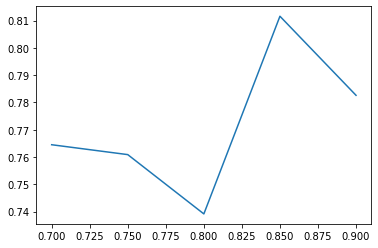

In [70]:
tes_size=[0.7,0.75,0.8,0.85,0.9]
acc_list=[]
for t_size in [0.7,0.75,0.8,0.85,0.9]:
  xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=t_size)
  acc_list.append(kmodel.score(xtest,ytest))
plot(tes_size,acc_list)



-------------------------------------
**Logistic regression**
---------------------------------------
--------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
lmodel=LogisticRegression()
lmodel.fit(xtrain,ytrain)

In [44]:
print(lmodel.score(xtrain,ytrain))
print(lmodel.score(xtest,ytest))


0.8488372093023255
0.8304347826086956


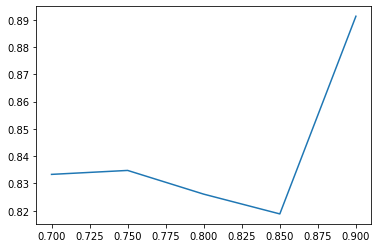

In [72]:
tes_size=[0.7,0.75,0.8,0.85,0.9]
acc_list=[]
for t_size in [0.7,0.75,0.8,0.85,0.9]:
  xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=t_size)
  acc_list.append(lmodel.score(xtest,ytest))
plot(tes_size,acc_list)



------
**Descision Tree**
-------
-------

In [53]:
from sklearn.tree import DecisionTreeClassifier
tmodel=DecisionTreeClassifier()
tmodel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [54]:
print(tmodel.score(xtrain,ytrain))
print(tmodel.score(xtest,ytest))

1.0
0.8043478260869565


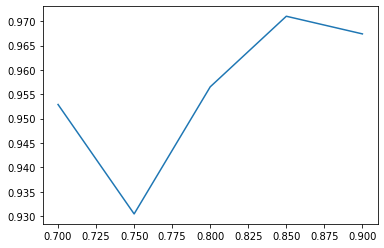

In [77]:
tes_size=[0.7,0.75,0.8,0.85,0.9]
acc_list=[]
for t_size in [0.7,0.75,0.8,0.85,0.9]:
  xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=t_size)
  acc_list.append(tmodel.score(xtest,ytest))
plot(tes_size,acc_list)

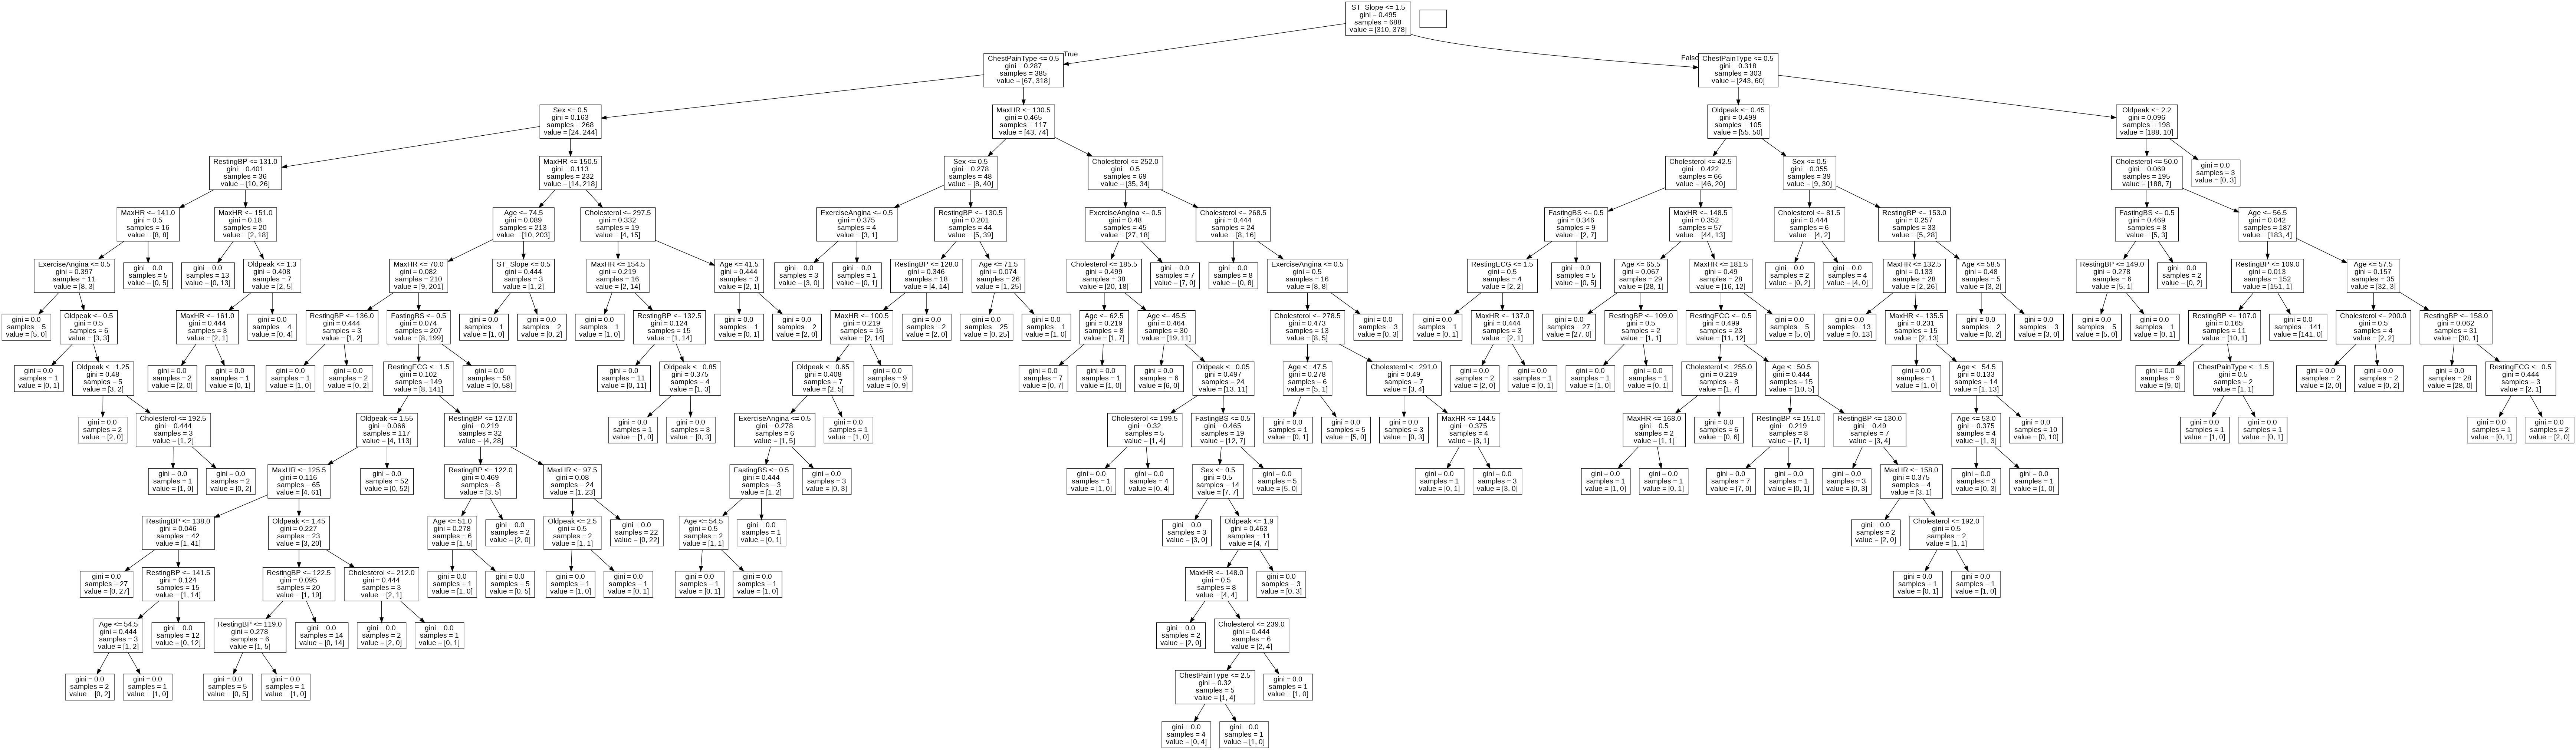

In [62]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(tmodel,feature_names=xtrain.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

------
**Random forest**
----
---

In [65]:
from sklearn.ensemble import RandomForestClassifier
Rmodel=RandomForestClassifier()
Rmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [79]:
print(Rmodel.score(xtrain,ytrain))
print(Rmodel.score(xtest,ytest))

0.9721549636803875
0.967391304347826


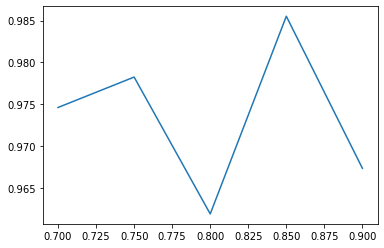

In [78]:
tes_size=[0.7,0.75,0.8,0.85,0.9]
acc_list=[]
for t_size in [0.7,0.75,0.8,0.85,0.9]:
  xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=t_size)
  acc_list.append(Rmodel.score(xtest,ytest))
plot(tes_size,acc_list)